In [1]:
#This run has altered shape parameter(15 instead of 2), 990 time steps

In [2]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import scipy.special as sps 
import math
from itertools import combinations
import itertools

<function matplotlib.pyplot.show(close=None, block=None)>

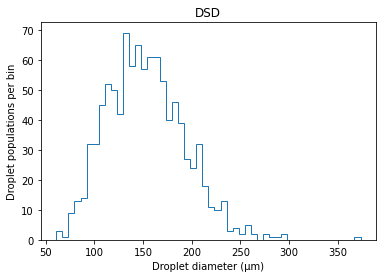

In [3]:
N=1000;
shape=15.;
scale = 1.;
numbins1=50;
numbins3=800;
D = (10**(-5))*np.random.gamma(shape, scale, N)

counts1a, bins1a = np.histogram(D,bins=numbins1)
plt.stairs(counts1a, bins1a*(10**6))
plt.xlabel('Droplet diameter (\u03bcm)')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.show
#initial DSD

<function matplotlib.pyplot.show(close=None, block=None)>

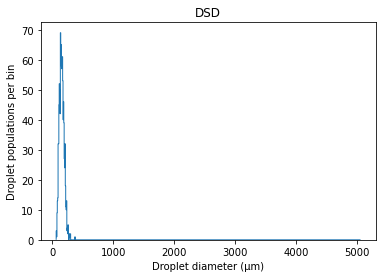

In [4]:
binsize_1=bins1a[1]-bins1a[0]
bins1_ext=np.arange(bins1a[0],bins1a[0]+binsize_1*(numbins3+1),binsize_1)
counts1_ext=np.concatenate((counts1a,np.zeros(numbins3-numbins1)),axis=None)

plt.stairs(counts1_ext, bins1_ext*(10**6))
plt.xlabel('Droplet diameter (\u03bcm)')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.show
#DSD

In [5]:
bins1_av_dia=(bins1a[0:-1]+bins1a[1:])/2#bins for size histogram
bins1_ext_av_dia=(bins1_ext[0:-1]+bins1_ext[1:])/2#bins for size histogram
total_droplet_population=np.sum(counts1a)
total_droplet_population

1000

<function matplotlib.pyplot.show(close=None, block=None)>

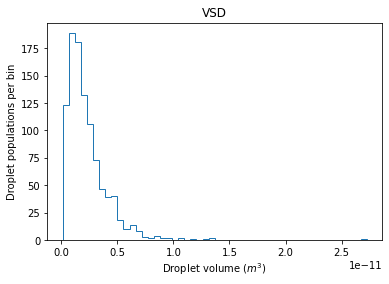

In [6]:
V=(np.pi/6)*(D**3)
counts2a, bins2a = np.histogram(V,bins=numbins1)
plt.stairs(counts2a, bins2a)
plt.xlabel('Droplet volume ($m^{3}$)')
plt.ylabel('Droplet populations per bin')
plt.title('VSD')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

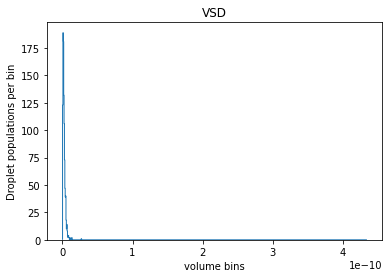

In [7]:
binsize_2=bins2a[1]-bins2a[0]
bins2_ext=np.arange(bins2a[0],bins2a[0]+binsize_2*(numbins3+1),binsize_2)
counts2_ext=np.concatenate((counts2a,np.zeros(numbins3-numbins1)),axis=None)

bins2_av_volms=(bins2a[0:-1]+bins2a[1:])/2#bins for volm histogram
bins2_ext_av_volms=(bins2_ext[0:-1]+bins2_ext[1:])/2#bins for volm histogram

plt.stairs(counts2_ext, bins2_ext)
plt.xlabel('volume bins')
plt.ylabel('Droplet populations per bin')
plt.title('VSD')
plt.show
#DSD

In [8]:
x = np.arange(numbins3)
combs=[p for p in itertools.product(x, repeat=2)]
combs1=np.array(combs)
sa1,sb1=np.shape(combs1)
combs3=combs1+np.ones((sa1,sb1))
#combs3

for i in range(sa1):
    if (combs1[i,0]+combs1[i,1]) > (numbins3-1):
        combs1[i,:]=-999
#combs1          
combs2 = np.delete(combs1, np.where(((combs1[:, 0]==-999))), axis=0)


sa2,sb2=np.shape(combs2)


for i in range(sa1):
    if (combs3[i,0]+combs3[i,1]) > numbins3:
        combs3[i,:]=-999
          
combs4 = np.delete(combs3, np.where(((combs3[:, 0]==-999))), axis=0)

sa4,sb4 = np.shape(combs4)

for i in range(sa4):
    for j in range(sb4):
        combs4[i,j]=int(combs4[i,j])
#combs2
#combs4

In [9]:
#fallspeed for cloud droplets, diameter must be given in m
def vt(arg1):#arg 1 is radius
    #vterm = ((arg1*100)**0.5)*20.1;#raindrop fall speed
    vterm = (1.19*(10**8))*(arg1)**2; #cloud droplet fall speed
    return vterm

#collision efficiency
def E_coll(arg1,arg2):#arg 1 and arg 2 are droplet radii
    k1=4.5*(10**4)*(10**4)#m-2
    k2=3*(10**(-4))*0.01#m
    r1=np.maximum(arg1,arg2)#m
    r2=np.minimum(arg1,arg2)#m
    ecoll=k1*(r1**2)*(1-k2)/r2
    return ecoll

#collision Kernel
def Kij(arg1,arg2):#arg 1 and arg 2 are droplet radii
    K = E_coll(arg1,arg2)*(np.pi/4)*((arg1+arg2)**2)*np.abs((vt(arg1)-vt(arg2)));
    return K

# radius from volm
def Rad(arg1):#arg 1 is volume
    rad=(arg1*3/(4*np.pi))**(1/3)
    return rad



In [10]:
# Fix random seed for repeatability
np.random.seed(123)

# Sample the period until the next event
def period_sampling(propensities):

    net_propensity = np.sum(propensities)

    return np.random.exponential(scale = 1 / net_propensity)

# Sample the reaction
def reaction_sampling(propensities):

    net_propensity = np.sum(propensities)
    
    normalized_propensity = [(propensity/net_propensity) for propensity in propensities]
        
    return np.random.choice(len(normalized_propensity), p = normalized_propensity)



K_combs=np.zeros((sa4,1))
# Define the reaction rates
for i in range(sa4):
    K_combs[i,0]=Kij(Rad(bins2_ext_av_volms[int(combs4[i,0])]),Rad(bins2_ext_av_volms[int(combs4[i,1])]));
   


In [11]:
# Define the initial populations and initial propensities
populations = counts2_ext
propensities=np.zeros((sa4))

for i in range(sa4):
    propensities[i] = K_combs[i,0]*populations[int(combs4[i,0])-1]*populations[int(combs4[i,1])-1]


In [12]:
zeta2=np.zeros((len(propensities),len(populations)))

for i in range(len(propensities)):
    zeta2[i,int(combs4[i,0]-1)]=zeta2[i,int(combs4[i,0]-1)]-1;
    zeta2[i,int(combs4[i,1]-1)]=zeta2[i,int(combs4[i,1]-1)]-1;
    zeta2[i,int((combs4[i,0]+combs4[i,1])-1)]=zeta2[i,int((combs4[i,0]+combs4[i,1])-1)]+1;

In [13]:
#define initial conditions of timestep and number of time step
dt=1;
nt=1;

#define total time steps
time_steps=4000

steps = time_steps    # Number of reactions per trajectory
cycles = 1  # Number of trajectories iterated over

In [ ]:
# Implement the Gillespie algorithm
populations_series=np.zeros((time_steps,len(populations),cycles))
time_en=np.zeros((time_steps,cycles))
populations_series[0,:,:]=np.resize(np.dstack([populations]*cycles),(len(populations),cycles))
c=0
#for c in range(1,cycles):
time = [0]
for i in range(1,time_steps):
    # Define the initial time
    # Sample the time
    t = time[-1]
    time_period = period_sampling(propensities)
#     print(i)
#     print(t)
    # Update the time
    time.append(t + time_period)
    time_en[i,c]=t + time_period
    # Sample the reaction
    g = reaction_sampling(propensities)
    # Update the population and propensities using the stoichometric array
    populations_series[i,:,c] = populations_series[i-1,:,c]+zeta2[g,:]#i is time-step; j is bin; g is reaction
    for k in range(sa4):
        propensities[k] = K_combs[k,0]*populations_series[i,int(combs4[k,0])-1,c]*populations_series[i,int(combs4[k,1])-1,c]

time1=time[1:]

In [ ]:
plt.stairs(populations_series[990,:,0], bins2_ext)
plt.xlabel('volume bins')
plt.ylabel('VSD')
#plt.xlim(-0.2e-12,4e-12)
plt.show()


In [ ]:
population_int=np.zeros((time_steps,len(populations),cycles))
population_int=(np.rint(populations_series)).astype(int)
population_int[0,0].dtype

In [ ]:
plt.stairs(counts1_ext, bins1_ext*(10**6))
plt.xlabel('size bins')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.show
#DSD

In [ ]:
np.sum(time[0:300])/60#time taken for 300 time steps

In [ ]:
np.sum(time[0:600])/60#time taken for 600 time steps

In [ ]:
np.sum(time[0:900])/60#time taken for 900 time steps

In [ ]:
np.sum(time[0:990])/60#time taken for 990 time steps

In [ ]:
unordered_new_V_test1=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[300,:,0]))
unordered_new_D_test1=(unordered_new_V_test1*6/np.pi)**(1/3)
counts_test1, bins_test1 = np.histogram(unordered_new_D_test1,bins=bins1_ext)

unordered_new_V_test2=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[600,:,0]))
unordered_new_D_test2=(unordered_new_V_test2*6/np.pi)**(1/3)
counts_test2, bins_test2 = np.histogram(unordered_new_D_test2,bins=bins1_ext)

unordered_new_V_test3=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[900,:,0]))
unordered_new_D_test3=(unordered_new_V_test3*6/np.pi)**(1/3)
counts_test3, bins_test3 = np.histogram(unordered_new_D_test3,bins=bins1_ext)

unordered_new_V_test4=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[990,:,0]))
unordered_new_D_test4=(unordered_new_V_test4*6/np.pi)**(1/3)
counts_test4, bins_test4 = np.histogram(unordered_new_D_test4,bins=bins1_ext)


In [ ]:
np.sum(unordered_new_V_test1)

In [ ]:
np.sum(unordered_new_V_test2)

In [ ]:
np.sum(unordered_new_V_test3)

In [ ]:
np.sum(unordered_new_V_test4)

In [ ]:
plt.stairs(counts_test1,bins_test1*(10**6),color='black',label='0 minute')
plt.stairs(counts_test2,bins_test2*(10**6),color='red',label='2 minutes')
plt.stairs(counts_test3,bins_test3*(10**6),color='blue',label='5 minutes')
plt.stairs(counts_test4,bins_test4*(10**6),color='magenta',label='6.6 minutes')
plt.xlabel('Droplet diameter (\u03bcm)')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.legend()
plt.show

plt.xlim(0,1000)

In [ ]:
plt.stairs(populations_series[300,:,0], bins2_ext,color='black',label='1 minute')
plt.stairs(populations_series[600,:,0], bins2_ext,color='red',label='3 minutes')
plt.stairs(populations_series[900,:,0], bins2_ext,color='blue',label='7 minutes')
plt.stairs(populations_series[990,:,0], bins2_ext,color='magenta',label='10 minutes')
plt.xlabel('Droplet volume ($m^3$)')
plt.ylabel('Droplet populations per bin')
plt.title('VSD')
plt.legend()
plt.show

#plt.xlim(0,0.6e-10)

In [ ]:
populations_series[800,:]-populations_series[3999,:]